In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn version: {}'.format(seaborn.__version__))


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (6, 3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

matplotlib version: 3.10.1
seaborn version: 0.13.2


In [7]:
path = 'ri_cleaned_z.csv'
#ri = pd.read_csv(path)  #,encoding='latin-1')
ri1=pd.read_csv(path)

In [8]:
ri1.sample(3)

True     make_model  \
13969  14198    Skoda Kamiq   
12000  12154     SEAT Ibiza   
19067  19528  Nissan Pulsar   

                                       short_description    make   model  \
13969                                    1.5 TSI Emotion   Skoda   Kamiq   
12000  1.6 TDI Style Navigatie Cruise control PDC Cli...    SEAT   Ibiza   
19067                            1.2 DIG-T Tekna XTronic  Nissan  Pulsar   

      location    price         body_type            type  doors  \
13969       ES  22500.0  Off-Road/Pick-up  Pre-registered    5.0   
12000       NL  13400.0           Compact            Used    5.0   
19067       ES  12991.0           Compact            Used    5.0   

      country_version offer_number  warranty  mileage first_registration  \
13969           Spain      7026906      12.0   4000.0         2022-02-01   
12000             NaN          NaN       NaN  63869.0         2018-11-01   
19067           Spain      7410185      12.0  69913.0         2015-05-01   

         gearbox fuel_type colour     paint  \
13969     Manual  Gasoline   Grey       NaN   
12000     Manual    Diesel   Blue  Metallic   
19067  Automatic  Gasoline    Red       NaN   

                                                    desc  seller  seats  \
13969  ('Precio al contado: 24900 euros', 'OPCIONALES...  Dealer    5.0   
12000  ("Wicke auto's is al jaren lang het juiste adr...  Dealer    5.0   
19067  ('Precio al contado: 13900 euros', 'Ref.  1647...  Dealer    5.0   

       power  engine_size  gears  CO2_emissions         manufacturer_colour  \
13969  150.0       1498.0    6.0            NaN  Gris Graphite (metalizado)   
12000   95.0       1598.0    5.0            NaN              Blauw metallic   
19067  116.0       1197.0    6.0            NaN                        Rojo   

      drivetrain  cylinders  \
13969      Front        4.0   
12000      Front        4.0   
19067      Front        4.0   

                                        fuel_consumption  \
13969  ('0 l/100 km (comb.)', '0 l/100 km (city)', '0...   
12000                               3.8 l/100 km (comb.)   
19067  ('5.1 l/100 km (comb.)', '6.4 l/100 km (city)'...   

                                     comfort_convenience  \
13969                                                NaN   
12000  Air conditioning, Armrest, Automatic climate c...   
19067  Air conditioning, Automatic climate control, C...   

                                     entertainment_media  \
13969                                                NaN   
12000  Bluetooth, CD player, Hands-free equipment, On...   
19067                               Bluetooth, CD player   

                                         safety_security  \
13969                                                NaN   
12000  ABS, Alarm system, Central door lock, Central ...   
19067  ABS, Central door lock, Fog lights, Immobilize...   

                                      extras  empty_weight model_code  \
13969                                    NaN        1231.0        NaN   
12000  Automatically dimming interior mirror        1156.0        NaN   
19067                           Alloy wheels        1273.0        NaN   

      general_inspection last_service full_service_history non_smoker_vehicle  \
13969                NaN          NaN                  NaN                NaN   
12000                New          NaN                  Yes                NaN   
19067                NaN          NaN                  NaN                NaN   

      emission_class emissions_sticker upholstery_colour upholstery  \
13969            NaN               NaN               NaN        NaN   
12000            NaN               NaN             Black      Cloth   
19067            NaN               NaN               NaN        NaN   

       production_date  previous_owner other_fuel_types  power_consumption  \
13969              NaN               0              NaN                NaN   
12000              NaN               1       

In [9]:
# task 5.     

#ri.paint      >>>>> ri1.paint    #binary

#   paint---->>>> Metallic 14494.  NaN 14135.    Uni/basic 1

# 1. Binary sütun oluştur: Metalic ise "Metalic", değilse "Non-Metalic"
ri1['paint'] = ri1['paint'].apply(lambda x: 'Metalic' if x == 'Metallic' else 'Non-Metallic')
ri1['paint']

0             Metalic
1        Non-Metallic
2        Non-Metallic
3        Non-Metallic
4             Metalic
5             Metalic
6        Non-Metallic
7             Metalic
8        Non-Metallic
9        Non-Metallic
10            Metalic
11            Metalic
12       Non-Metallic
13            Metalic
14       Non-Metallic
15            Metalic
16       Non-Metallic
17            Metalic
18            Metalic
19       Non-Metallic
20       Non-Metallic
21            Metalic
22       Non-Metallic
23       Non-Metallic
24       Non-Metallic
25       Non-Metallic
26       Non-Metallic
27       Non-Metallic
28       Non-Metallic
29            Metalic
30       Non-Metallic
31       Non-Metallic
32       Non-Metallic
33       Non-Metallic
34       Non-Metallic
35            Metalic
36       Non-Metallic
37       Non-Metallic
38            Metalic
39            Metalic
40       Non-Metallic
41            Metalic
42            Metalic
43       Non-Metallic
44       Non-Metallic
45       N

In [10]:
# task 5
# ri1.colour    >>>>>> ri1.colour   #imputed



print(ri1.colour.value_counts(dropna=False))
print("-" * 20)
# 1. Başlangıç: yeni sütunu orijinal colour ile oluştur
# ri1['colour_imputed'] = ri1['colour']

# 2. Make–model bazlı mod imputasyon (sadece ≥20 kaydı olan gruplar)
counts    = ri1['make_model'].value_counts()
eligible  = counts[counts >= 20].index
mode_map  = (
    ri1[ri1['make_model'].isin(eligible)]
      .groupby('make_model')['colour']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)
mask      = ri1['colour'].isna() & ri1['make_model'].isin(mode_map.index)
ri1.loc[mask, 'colour'] = ri1.loc[mask, 'make_model'].map(mode_map)

# 3. İlk dolgu sonrası değer dağılımı
print("After mode imputation:")
print(ri1['colour'].value_counts(dropna=False))
print("-" * 20)

# 4. Grup içinde forward/backward fill (ffill then bfill)
ri1 = ri1.sort_values('make_model')
ri1['colour'] = (
    ri1
    .groupby('make_model')['colour']
    .transform(lambda s: s.ffill().bfill())
)

# 5. Son durumda kalan NaN ve dağılım
print("\nAfter ffill/bfill:")
print(ri1['colour'].value_counts(dropna=False))
print("-" * 20)


"""
# 1. En popüler 5 rengi belirle
top_colors = ri1['colour_imputed'].value_counts().nlargest(5).index.tolist()

# 2. İkili sınıflama: popüler renkler vs diğerleri
ri1['colour_binary'] = ri1['colour_imputed'].apply(
    lambda x: 'Popular' if x in top_colors else 'Other'
)

# Sonuç kontrolü
print(ri1['colour_binary'].value_counts(dropna=False))
"""

colour
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: count, dtype: int64
--------------------
After mode imputation:
colour
Black     6926
Grey      6567
White     5756
Blue      3500
Red       2247
Silver    1634
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
NaN         92
Bronze      65
Gold        62
Name: count, dtype: int64
--------------------

After ffill/bfill:
colour
Black     6942
Grey      6581
White     5771
Blue      3508
Red       2256
Silver    1638
Green      456
Brown      440
Orange     288
Beige      279
Yellow     230
Violet      98
Bronze      66
Gold        62
NaN         15
Name: count, dtype: int64
--------------------


"\n# 1. En popüler 5 rengi belirle\ntop_colors = ri1['colour_imputed'].value_counts().nlargest(5).index.tolist()\n\n# 2. İkili sınıflama: popüler renkler vs diğerleri\nri1['colour_binary'] = ri1['colour_imputed'].apply(\n    lambda x: 'Popular' if x in top_colors else 'Other'\n)\n\n# Sonuç kontrolü\nprint(ri1['colour_binary'].value_counts(dropna=False))\n"

In [13]:
# task 5
# ri1.upholstery    >>>>>> ri1.upholstery  imputed


"""
upholstery

Bu fonksiyon, aracın iç döşemesi (upholstery) sütunundaki eksik değerleri 
çok aşamalı bir yaklaşımla doldurur ve ardından Premium/Standart olarak 
ikili sınıflandırma gerçekleştirir.


Adım 1: Orijinal 'upholstery' sütununu koruyarak 'upholstery' adlı yeni bir sütun oluşturur.
Adım 2: 'make_model' grubunda en az 20 kaydı olanlar için mod (en sık değer) imputasyonu uygular.
Adım 3: Aynı 'make_model' grubu içindeki eksikleri ardışık komşu doldurma (ffill + bfill) ile tamamlar.
----
Adım 4: Dolgu öncesi ve sonrası eksik sayılarını hesaplar.
Adım 5: 'full leather', 'part leather' ve 'alcantara' tiplerini Premium; diğer tüm tipleri Standart olarak etiketler.
Adım 6: Hâlâ eksik kalan satırlar için bir bayrak (upholstery_missing) ekler.
"""

# 1. Başlangıç: yeni sütunu orijinal upholstery ile oluştur
ri1['upholstery'] = ri1['upholstery']

# 2. Make–model bazlı mod imputasyon (sadece ≥20 kaydı olan gruplar)
counts = ri1['make_model'].value_counts()
eligible_models = counts[counts >= 20].index

mode_map = (
    ri1[ri1['make_model'].isin(eligible_models)]
 
     .groupby('make_model')['upholstery']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)

mask_mode = ri1['upholstery'].isna() & ri1['make_model'].isin(eligible_models)
ri1.loc[mask_mode, 'upholstery'] = ri1.loc[mask_mode, 'make_model'].map(mode_map)

# 3. Grup içi forward/backward fill (ffill + bfill)
ri1 = ri1.sort_values('make_model')

ri1['upholstery'] = (
    ri1
    .groupby('make_model')['upholstery']
    .transform(lambda s: s.ffill().bfill())
)

# 4. Kalan NaN sayısını kontrol
remaining_nans = ri1['upholstery'].isna().sum()
result = pd.DataFrame({
    'count_before': ri1['upholstery'].isna().sum(),
    'count_after': ri1['upholstery'].isna().sum()
}, index=['upholstery'])
print(result)


'''
# 5. Premium olarak kabul edilecek upholstery türleri
premium_types = {'full leather', 'part leather', 'alcantara'}

# 6. İkili sınıflandırma fonksiyonu (imputed sütunla)
def classify_imputed(x):
    if isinstance(x, str) and x.lower() in premium_types:
        return 'Premium'
    else:
        return 'Standart'

ri1['upholstery']   = ri1['upholstery'].apply(classify_imputed)
# Hâlâ NaN kalanlar için missing flag
#ri1['upholstery_missing'] = ri1['upholstery'].isna().astype(int)

# Sonuç kontrolü
print(ri1['upholstery'].value_counts(dropna=False))
print(ri1[['upholstery','upholstery']].sample(10)
'''

            count_before  count_after
upholstery            86           86


"\n# 5. Premium olarak kabul edilecek upholstery türleri\npremium_types = {'full leather', 'part leather', 'alcantara'}\n\n# 6. İkili sınıflandırma fonksiyonu (imputed sütunla)\ndef classify_imputed(x):\n    if isinstance(x, str) and x.lower() in premium_types:\n        return 'Premium'\n    else:\n        return 'Standart'\n\nri1['upholstery_class']   = ri1['upholstery'].apply(classify_imputed)\n# Hâlâ NaN kalanlar için missing flag\nri1['upholstery_missing'] = ri1['upholstery'].isna().astype(int)\n\n# Sonuç kontrolü\nprint(ri1['upholstery_class'].value_counts(dropna=False))\nprint(ri1[['upholstery','upholstery_class','upholstery_missing']].sample(10)\n"

In [18]:
ri1.sample(3)

True               make_model                   short_description  \
28330  29158  Volvo V40 Cross Country                              2.0 D3   
22667  23285               Ford Focus  Turnier 1.0 EcoBoost Hybrid ACTIVE   
17378  17737            Toyota Celica                      2p 2.0 GT Four   

         make              model location    price      body_type  type  \
28330   Volvo  V40 Cross Country       ES  13990.0          Sedan  Used   
22667    Ford              Focus       DE  27350.0  Station wagon  Used   
17378  Toyota             Celica       IT  28000.0          Coupe  Used   

       doors country_version offer_number  warranty   mileage  \
28330    5.0           Spain      7274141      12.0  148915.0   
22667    5.0             NaN         6570       NaN   20600.0   
17378    2.0             NaN          NaN       NaN  148590.0   

      first_registration gearbox                   fuel_type colour  \
28330         2018-04-01  Manual                      Diesel    Red   
22667         2021-10-01  Manual  Super 95 (Particle filter)  Black   
17378         1994-08-01  Manual                    Gasoline   Grey   

              paint                                               desc  \
28330  Non-Metallic  ('Precio al contado: 15390 euros', 'Clicars, N...   
22667       Metalic  ("ABS elektronisch mit EBD, Airbag: Beifahrera...   
17378       Metalic  Come da titolo vendo Celica ST205 GT4 del '94....   

               seller  seats  power  engine_size  gears  CO2_emissions  \
28330          Dealer    NaN  150.0       1969.0    NaN            NaN   
22667          Dealer    5.0  155.0        998.0    6.0            0.0   
17378  Private seller    4.0  242.0       1998.0    NaN            NaN   

        manufacturer_colour drivetrain  cylinders  \
28330                  Rojo        NaN        NaN   
22667  Agate Black Metallic      Front        3.0   
17378                   NaN        NaN        NaN   

                                        fuel_consumption  \
28330  ('3.9 l/100 km (comb.)', '4.3 l/100 km (city)'...   
22667  ('0 l/100 km (comb.)', '0 l/100 km (city)', '0...   
17378                                                NaN   

                                     comfort_convenience  \
28330  Air conditioning, Automatic climate control, C...   
22667  Air conditioning, Armrest, Automatic climate c...   
17378                                                NaN   

                                     entertainment_media  \
28330                                     Bluetooth, USB   
22667  Android Auto, Apple CarPlay, Bluetooth, Digita...   
17378                                                NaN   

                                         safety_security  \
28330                                             Isofix   
22667  ABS, Adaptive headlights, Central door lock, C...   
17378                                                NaN   

                                                  extras  empty_weight  \
28330                                       Alloy wheels           NaN   
22667  All season tyres, Alloy wheels (17"), Automati...        1388.0   
17378                                                NaN           NaN   

      model_code general_inspection last_service full_service_history  \
28330        NaN                NaN          NaN                  NaN   
22667   8566/BUE                NaN          NaN                  NaN   
17378        NaN                NaN          NaN                  NaN   

      non_smoker_vehicle emission_class emissions_sticker upholstery_colour  \
28330                NaN            NaN               NaN               NaN   
22667                NaN        Euro 6d         4 (Green)               NaN   
17378                NaN            NaN               NaN               NaN   

         upholstery  production_date  previous_owner other_fuel_types  \
28330  Full leather              NaN               0              NaN   
22667         Cloth         

After init, NaNs: 10036
After quadruple-mode, NaNs: 2986
After triple-mode, NaNs: 1726
After ffill/bfill, NaNs: 1227
After global median, NaNs: 0


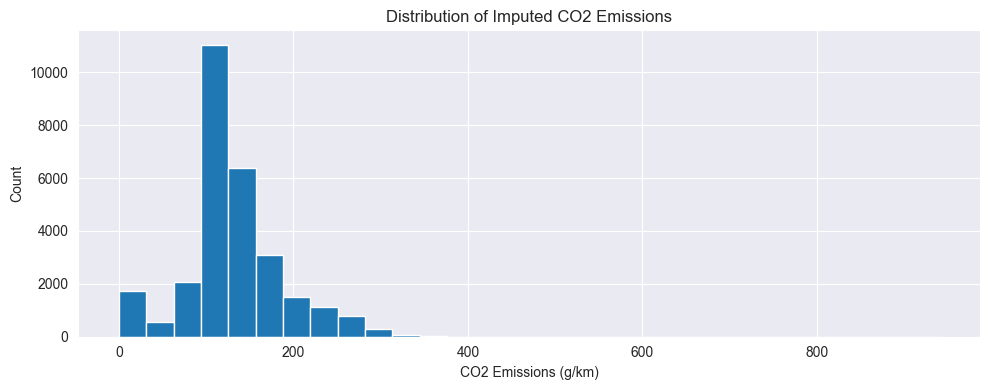

In [19]:
# 0. Preparations
# ----------------
# # Clean CO2 emissions
# ri1['CO2_emissions'] = (
#     ri1['CO2_emissions'].astype(str)
#                       .str.extract(r'(\d+)', expand=False)
# )
# ri1['CO2_emissions'] = pd.to_numeric(ri1['CO2_emissions'], errors='coerce')

# # Parse engine size (cc)
# ri1['engine_size'] = (
#     ri1['engine_size'].astype(str)
#                       .str.replace(r'[^0-9]', '', regex=True)
#                       .replace('', pd.NA)
# )
# ri1['engine_size'] = pd.to_numeric(ri1['engine_size'], errors='coerce')

# Define engine_size bins (200 cc intervals)
max_cc = int(ri1['engine_size'].max(skipna=True))
bins = np.arange(0, max_cc + 200, 200)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
ri1['engine_size_bin'] = pd.cut(ri1['engine_size'], bins=bins, labels=labels, right=False)

# 1. Initialize imputed column
# -----------------------------
ri1['CO2_emissions'] = ri1['CO2_emissions']
print("After init, NaNs:", ri1['CO2_emissions'].isna().sum())

# 2. Quadruple group mode imputation
# -----------------------------------
quad_counts = ri1.groupby(['make','model','fuel_type_new','engine_size_bin'])['CO2_emissions'].transform('size')
mode_quad = (
    ri1[quad_counts >= 10]
      .groupby(['make','model','fuel_type_new','engine_size_bin'])['CO2_emissions']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)
mask_quad = ri1['CO2_emissions'].isna() & quad_counts.ge(10)
ri1.loc[mask_quad, 'CO2_emissions'] = (
    ri1.loc[mask_quad]
       .set_index(['make','model','fuel_type_new','engine_size_bin'])
       .index.map(mode_quad)
)
print("After quadruple-mode, NaNs:", ri1['CO2_emissions'].isna().sum())

# 3. Triple group mode imputation
# --------------------------------
ri1['CO2_emissions'] = ri1['CO2_emissions'].fillna(ri1['CO2_emissions'])
triple_counts = ri1.groupby(['make','model','fuel_type_new'])['CO2_emissions'].transform('size')
mode_triple = (
    ri1[triple_counts >= 20]
      .groupby(['make','model','fuel_type_new'])['CO2_emissions']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)
mask_triple = ri1['CO2_emissions'].isna() & triple_counts.ge(20)
ri1.loc[mask_triple, 'CO2_emissions'] = (
    ri1.loc[mask_triple]
       .set_index(['make','model','fuel_type_new'])
       .index.map(mode_triple)
)
print("After triple-mode, NaNs:", ri1['CO2_emissions'].isna().sum())

# 4. Triple group forward/backward fill
# --------------------------------------
ri1 = ri1.sort_values(['make','model','fuel_type_new'])
ri1['CO2_emissions'] = (
    ri1
      .groupby(['make','model','fuel_type_new'])['CO2_emissions']
      .transform(lambda s: s.ffill().bfill())
)
print("After ffill/bfill, NaNs:", ri1['CO2_emissions'].isna().sum())

# 5. Final fallback: global median
# ---------------------------------
global_med = ri1['CO2_emissions'].median()
ri1['CO2_emissions'] = ri1['CO2_emissions'].fillna(global_med)
print("After global median, NaNs:", ri1['CO2_emissions'].isna().sum())

# 6. (Optional) Visualize resulting distribution
plt.figure(figsize=(10,4))
ri1['CO2_emissions'].hist(bins=30)
plt.title("Distribution of Imputed CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [26]:
ri1.sample(3)

True  make_model                                 short_description  \
11322  11454   Fiat Tipo                                     1.4i Business   
3571    3584  Opel Corsa  Corsa 3p 1.2 Club Gpl-tech 85cv  OK NEOPATENTATI   
3686    3699  Opel Mokka  Innovation 4x4 NAVI RÜCKFAHRKAMERA FLA Leder KAM   

       make  model location    price         body_type  type  doors  \
11322  Fiat   Tipo       BE  11400.0     Station wagon  Used    5.0   
3571   Opel  Corsa       IT   5200.0             Coupe  Used    3.0   
3686   Opel  Mokka       DE  11980.0  Off-Road/Pick-up  Used    5.0   

      country_version  warranty   mileage first_registration gearbox  \
11322         Belgium       NaN   55259.0         2018-04-01  Manual   
3571            Italy      12.0  143000.0         2012-10-01  Manual   
3686          Germany      60.0   67746.0         2013-04-01  Manual   

          fuel_type colour    paint  \
11322      Gasoline   Grey  Metalic   
3571       Gasoline   Grey  Metalic   
3686   Super E10 95  Brown  Metalic   

                                                    desc  seller  seats  \
11322  ('* Avec une garantie de 12 mois', '* Prêt pou...  Dealer    5.0   
3571   ('CONTATTI', 'DARIO: 339-8242655', 'ANTONIO: 3...  Dealer    5.0   
3686   ('Fernlichtassistent', 'Klimaautomatik 2-Zonen...  Dealer    5.0   

       power  engine_size  gears  CO2_emissions manufacturer_colour  \
11322   95.0       1368.0    6.0          132.0                 NaN   
3571    86.0       1229.0    5.0          124.0                 NaN   
3686   140.0       1364.0    6.0          154.0      Espresso Braun   

      drivetrain  cylinders  \
11322      Front        4.0   
3571       Front        4.0   
3686         4WD        4.0   

                                        fuel_consumption  \
11322  ('5.7 l/100 km (comb.)', '7.7 l/100 km (city)'...   
3571   ('5.3 l/100 km (comb.)', '6.9 l/100 km (city)'...   
3686   ('6.5 l/100 km (comb.)', '8.1 l/100 km (city)'...   

                                     comfort_convenience  \
11322  Air conditioning, Automatic climate control, E...   
3571   Air conditioning, Armrest, Electrical side mir...   
3686   Air conditioning, Armrest, Automatic climate c...   

                                     entertainment_media  \
11322  Bluetooth, CD player, Digital cockpit, Digital...   
3571       CD player, MP3, On-board computer, Radio, USB   
3686   Bluetooth, CD player, Hands-free equipment, In...   

                                         safety_security  \
11322  ABS, Central door lock, Central door lock with...   
3571   ABS, Alarm system, Central door lock, Central ...   
3686   ABS, Adaptive headlights, Alarm system, Bi-Xen...   

                                                  extras  empty_weight  \
11322  Alloy wheels, Emergency tyre repair kit, Roof ...        1280.0   
3571   Alloy wheels (16"), Ambient lighting, Sport pa...        1105.0   
3686   Alloy wheels, Ambient lighting, Automatically ...        1445.0   

      model_code general_inspection last_service full_service_history  \
11322        NaN                NaN      07/2022                  NaN   
3571         NaN                NaN          NaN                  NaN   
3686    0035/AWT                New          NaN                  NaN   

      non_smoker_vehicle emission_class emissions_sticker upholstery_colour  \
11322                Yes         Euro 6               NaN              Grey   
3571                 NaN         Euro 5               NaN             Black   
3686                 NaN         Euro 6               NaN             Other   

         upholstery  production_date  previous_owner other_fuel_types  \
11322         Cloth              NaN               1              NaN   
3571   Part leather              NaN               1              NaN   
3686   Full leather           2014.0               2              NaN   

       power_consumption energy_efficiency_class  \
11322                NaN             

In [39]:
ri1.drop(['last_service', 'other_fuel_types', 'power_consumption',
       'fuel_consumption_wltp', 'CO2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'], axis=1, inplace=True)

In [42]:
ri1.sample(3).T

2760   \
make_model                                                       Fiat 500X   
short_description                               NUEV  URB 1.0 GSE 88KW 120   
make                                                                  Fiat   
model                                                                 500X   
location                                                                ES   
price                                                              17400.0   
body_type                                                 Off-Road/Pick-up   
type                                                                  Used   
doors                                                                  5.0   
country_version                                                      Spain   
warranty                                                              12.0   
mileage                                                            29925.0   
first_registration                                              2020-07-01   
gearbox                                                             Manual   
fuel_type                                                         Gasoline   
colour                                                                 Red   
paint                                                         Non-Metallic   
desc                     ('Precio al contado: 19600 euros', 'VEHÍCULO C...   
seller                                                              Dealer   
seats                                                                  NaN   
power                                                                120.0   
engine_size                                                         1000.0   
gears                                                                  NaN   
CO2_emissions                                                        156.0   
manufacturer_colour                                                   Rojo   
drivetrain                                                             NaN   
cylinders                                                              NaN   
fuel_consumption                                      5.8 l/100 km (comb.)   
comfort_convenience                                                    NaN   
entertainment_media                                                    NaN   
safety_security                                                        NaN   
extras                                                                 NaN   
empty_weight                                                           NaN   
model_code                                                             NaN   
general_inspection                                                     NaN   
full_service_history                                                   NaN   
non_smoker_vehicle                                                     NaN   
emission_class                                                         NaN   
emissions_sticker                                                      NaN   
upholstery_colour                                                      NaN   
upholstery                                                    Part leather   
production_date                                                        NaN   
previous_owner                                                           0   
energy_efficiency_class                                                NaN   
CO2_efficiency                                                         NaN   
age                                                                    2.0   
fuel_type_new                                                       Petrol   

                                                                     16871  \
make_model                                                     Peugeot 508   
short_description             2.0 BlueHDi Kombi Aut. RXH+LED+Navi+Head-up+   
make                                                               Peugeot   
model       

In [ ]:
  # ri1.to_csv('nan_doluyor.csv', index=False)
  # ri1.to_excel('nan_d_oluyor.xlsx', index=False)


In [41]:
# İndeksleri 0’dan başlayacak şekilde yenile
ri1.reset_index(drop=True, inplace=True)

# Yeni shape’i yazdır
print(ri1.shape)

(28630, 47)


In [43]:
ri1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28415 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28354 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  float64
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  float64
 9   country_version          16889 non-null  object 
 10  warranty                 13465 non-null  float64
 11  mileage                  28629 non-null  float64
 12  first_registration       28628 non-null  object 
 13  gearbox                  28382 non-null  object 
 14  fuel_type             

In [ ]:
power ikile.  - fuel cons 3le  general_inspection

In [45]:
cols_to_drop = [
    'country_version',
    'first_registration',
    'colour',
    'desc',
    'manufacturer_colour',
    'model_code',
    'general_inspection',
    'non_smoker_vehicle',
    'emission_class',
    'emissions_sticker',
    'upholstery_colour',
    'production_date',
    'CO2_efficiency'
]

ri1.drop(columns=cols_to_drop, inplace=True)

In [48]:
#ri1[['power_kW', 'power_hp']] = ri1["power"].apply(lambda item: item[0] if type(item) == list else item)\
                     #         .str.extract(r'\D*(?P<kW>\d+)\D+(?P<hp>\d+)').astype(float)
ri1.sample(1)

make_model                   short_description  make  model location  \
13111  Opel Astra  1.2 Turbo Elegance Top Ausstattung  Opel  Astra       DE   

         price body_type           type  doors  warranty  mileage gearbox  \
13111  28990.0     Sedan  Demonstration    5.0      72.0   5000.0  Manual   

                            fuel_type    paint  seller  seats  power  \
13111  Super E10 95 (Particle filter)  Metalic  Dealer    5.0  131.0   

       engine_size  gears  CO2_emissions drivetrain  cylinders  \
13111       1199.0    6.0            0.0        NaN        NaN   

                                        fuel_consumption  \
13111  ('5.5 l/100 km (comb.)', '6.6 l/100 km (city)'...   

                                     comfort_convenience  \
13111  Air conditioning, Armrest, Automatic climate c...   

                                     entertainment_media  \
13111  Android Auto, Apple CarPlay, Bluetooth, Digita...   

                                         safety_security  \
13111  ABS, Central door lock, Daytime running lights...   

                                                  extras  empty_weight  \
13111  Alloy wheels (17"), Ambient lighting, Automati...        1341.0   

      full_service_history    upholstery  previous_owner  \
13111                  Yes  Part leather               1   

      energy_efficiency_class  age fuel_type_new  
13111                    A+++  0.0        Petrol

In [49]:
ri1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28415 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28354 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  float64
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  float64
 9   warranty                 13465 non-null  float64
 10  mileage                  28629 non-null  float64
 11  gearbox                  28382 non-null  object 
 12  fuel_type                26843 non-null  object 
 13  paint                    28630 non-null  object 
 14  seller                

In [70]:

# 1) Kolon genişliğini sınırsız yap
pd.set_option('display.max_colwidth', None)

ri1["fuel_consumption"].sample(50)


26832      ('3.4 l/100 km (comb.)', '3.7 l/100 km (city)', '3.2 l/100 km (country)')
5937                                                            9.2 l/100 km (comb.)
16778      ('5.3 l/100 km (comb.)', '6.1 l/100 km (city)', '4.8 l/100 km (country)')
1286                                                                             NaN
21333        ('7.3 l/100 km (comb.)', '9 l/100 km (city)', '6.3 l/100 km (country)')
5250       ('4.8 l/100 km (comb.)', '4.9 l/100 km (city)', '3.8 l/100 km (country)')
19763      ('4.8 l/100 km (comb.)', '5.8 l/100 km (city)', '4.2 l/100 km (country)')
12406                                                                            NaN
13795                                                           5.5 l/100 km (comb.)
11801      ('5.2 l/100 km (comb.)', '6.3 l/100 km (city)', '4.6 l/100 km (country)')
4495                                                                             NaN
13818      ('5.6 l/100 km (comb.)', '7.3 l/100 km (city)', '4.6 l

In [76]:
import re
import numpy as np
import pandas as pd

def extract_fuel_consumption(ri1, src_col='fuel_consumption'):
    """
    ri1[src_col] içindeki fuel consumption metinlerinden litre/100 km cinsinden
    comb., city ve country değerlerini ayıklar ve bunları üç yeni sütuna yazar:
      - cons_avg     (comb.)
      - cons_city    (city)
      - cons_country (country)
    
    Eksik olan bölümler np.nan ile doldurulur.
    """
    def _parse(x):
        # NaN veya None
        if pd.isna(x):
            return pd.Series([np.nan, np.nan, np.nan])
        # tuple veya list içindeyse birleştir
        if isinstance(x, (list, tuple)):
            s = " ".join(x)
        else:
            s = str(x)
        # regex ile grupları yakala
        comb_m   = re.search(r'([\d\.]+)\s*l/100\s*km\s*\(comb\.\)',   s)
        city_m   = re.search(r'([\d\.]+)\s*l/100\s*km\s*\(city\)',    s)
        country_m= re.search(r'([\d\.]+)\s*l/100\s*km\s*\(country\)', s)
        return pd.Series([
            float(comb_m.group(1))   if comb_m   else np.nan,
            float(city_m.group(1))   if city_m   else np.nan,
            float(country_m.group(1)) if country_m else np.nan,
        ])

    ri1[['cons_avg','cons_city','cons_country']] = ri1[src_col].apply(_parse)
    return ri1

In [78]:
ri1 = extract_fuel_consumption(ri1, src_col='fuel_consumption')



#ri1[['cons_avg','cons_city','cons_country']]

In [79]:
ri1[['cons_avg','cons_city','cons_country']]

cons_avg  cons_city  cons_country
0           NaN        NaN           NaN
1           4.2        4.4           4.1
2           4.2        4.4           4.1
3           NaN        NaN           NaN
4           4.2        4.4           4.1
5           4.2        4.4           4.1
6           4.5        5.2           4.1
7           4.2        4.4           4.1
8           4.5        5.2           4.1
9           4.3        4.7           4.0
10          4.2        4.4           4.1
11          4.5        5.2           4.1
12          4.2        4.4           4.1
13          4.2        4.4           4.1
14          4.5        5.2           4.1
15          4.4        4.7           4.1
16          4.4        4.7           4.1
17          4.2        4.4           4.1
18          NaN        NaN           NaN
19          NaN        NaN           NaN
20          NaN        NaN           NaN
21          4.5        5.2           4.1
22          NaN        NaN           NaN
23          NaN        NaN           NaN
24          NaN        NaN           NaN
25          NaN        NaN           NaN
26          4.2        4.4           4.1
27          4.1        4.4           4.0
28          4.2        4.4           4.1
29          NaN        NaN           NaN
30          4.5        5.2           4.1
31          5.0        4.7           4.1
32          NaN        NaN           NaN
33          7.1        9.4           5.7
34          7.2        9.7           5.8
35          NaN        NaN           NaN
36          6.3        7.9           5.4
37          6.1        7.8           5.2
38          5.7        6.8           5.4
39          5.7        6.8           5.1
40          6.2        7.7           5.3
41          6.1        7.3           5.5
42          6.2        7.7           5.3
43          6.8        8.3           6.0
44          6.0        7.4           5.2
45          6.7        6.8           6.2
46          6.7        7.9           5.9
47          6.3        7.9           5.4
48          NaN        NaN           NaN
49          5.7        6.8           5.1
50          6.2        7.7           5.4
51          5.7        6.8           5.4
52          5.7        6.8           5.4
53          6.2        NaN           NaN
54          6.3        7.9           5.4
55          6.2        7.7           5.3
56          6.8        8.3           6.0
57          4.7        4.8           4.7
58          4.4        5.7           3.0
59          4.8        4.9           4.8
60          4.4        5.7           3.0
61          4.4        4.5           4.4
62          4.7        4.8           4.7
63          0.0        0.0           0.0
64          5.1        5.7           4.9
65          4.4        4.5           4.3
66          5.0        NaN           NaN
67          4.4        4.5           4.3
68          4.4        4.5           4.3
69          NaN        NaN           NaN
70          4.7        NaN           NaN
71          NaN        NaN           NaN
72          4.4        4.8           4.1
73          0.0        0.0           0.0
74          4.7        4.8           4.7
75          5.3        6.4           4.9
76          0.0        0.0           0.0
77          4.8        5.5           4.5
78          5.3        6.4           4.9
79          4.0        4.6           3.7
80          0.0        0.0           0.0
81          4.7        4.8           4.7
82          4.7        4.8           4.7
83          4.7        4.8           4.7
84          4.7        4.8           4.7
85          4.4        4.8           4.1
86          4.0        4.6           3.7
87          5.1        5.7           4.9
88          0.0        0.0           0.0
89          4.4        5.7           3.0
90          4.4        5.7           3.0
91          4.8        5.5           4.5
92          4.4        4.5           4.4
93          NaN        NaN           NaN
94          5.1        5.7           4.9
95          4.4        4.5           4.3
96          5.3        6.4    

In [83]:
#ri1.head().T

In [82]:
result = ri1.loc[ri1['mileage'] == 18995.00]
result

make_model short_description           make     model  \
8417  Mercedes-Benz A 35 AMG    4Matic+ 7G-DCT  Mercedes-Benz  A 35 AMG   

     location    price body_type  type  doors  warranty  mileage    gearbox  \
8417       ES  46990.0   Compact  Used    5.0      12.0  18995.0  Automatic   

     fuel_type         paint  seller  seats  power  engine_size  gears  \
8417  Gasoline  Non-Metallic  Dealer    5.0  306.0       1991.0    7.0   

      CO2_emissions drivetrain  cylinders  \
8417          169.0        4WD        4.0   

                                                               fuel_consumption  \
8417  ('7.3 l/100 km (comb.)', '9.3 l/100 km (city)', '6.1 l/100 km (country)')   

                                                          comfort_convenience  \
8417  Air conditioning, Automatic climate control, Power windows, Rain sensor   

     entertainment_media  \
8417                 USB   

                                                                                 safety_security  \
8417  ABS, Central door lock, Driver-side airbag, Electronic stability control, Traction control   

           extras  empty_weight full_service_history    upholstery  \
8417  Sport seats           NaN                  NaN  Full leather   

      previous_owner energy_efficiency_class  age fuel_type_new  cons_avg  \
8417               0                     NaN  2.0        Petrol       7.3   

      cons_city  cons_country  
8417        9.3           6.1

In [84]:
ri1.drop(columns=['fuel_consumption'], inplace=True)


In [88]:
ri1.power

0          NaN
1         75.0
2         75.0
3         90.0
4         90.0
5         75.0
6         75.0
7         90.0
8         75.0
9         95.0
10        90.0
11        90.0
12        75.0
13        90.0
14        75.0
15        95.0
16        95.0
17        75.0
18        95.0
19        95.0
20        95.0
21        75.0
22        75.0
23        95.0
24        95.0
25        95.0
26        90.0
27        75.0
28        90.0
29        90.0
30        75.0
31        95.0
32       102.0
33        83.0
34        83.0
35       109.0
36       102.0
37       102.0
38       109.0
39       116.0
40       102.0
41       131.0
42       116.0
43       102.0
44       131.0
45       116.0
46       102.0
47       102.0
48       116.0
49       116.0
50       131.0
51       109.0
52       109.0
53       101.0
54       102.0
55       102.0
56       102.0
57       109.0
58       116.0
59       109.0
60       116.0
61       109.0
62       116.0
63       116.0
64        86.0
65        90.0
66        

In [90]:
# 1) Eski fuel_type sütununu sil
ri1.drop(columns=['fuel_type'], inplace=True)

# 2) fuel_type_new’i fuel_type olarak yeniden adlandır
ri1.rename(columns={'fuel_type_new': 'fuel_type'}, inplace=True)

In [92]:
ri1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28415 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28354 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  float64
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  float64
 9   warranty                 13465 non-null  float64
 10  mileage                  28629 non-null  float64
 11  gearbox                  28382 non-null  object 
 12  paint                    28630 non-null  object 
 13  seller                   28630 non-null  object 
 14  seats                 

In [97]:
# Task 13 **"full_service_history"**
ri1["full_service_history"] = ri1["full_service_history"].apply(lambda x : "yes" if pd.notna(x) else"no")
ri1.full_service_history.value_counts(dropna=False)

full_service_history
no     16065
yes    12565
Name: count, dtype: int64

In [99]:
ri1.drop(columns=['doors'], inplace=True)


In [104]:
ri1.sample(2)

make_model                           short_description     make model  \
23558  Toyota C-HR       2.0 Hybrid Team D *schnell verfügbar*   Toyota  C-HR   
7471   Hyundai i30  N Performance 8DCT NaviP  KomfortP AssistP  Hyundai   i30   

      location    price         body_type            type  warranty  mileage  \
23558       DE  29790.0  Off-Road/Pick-up  Pre-registered      84.0     10.0   
7471        DE  43770.0             Sedan   Demonstration       NaN   3009.0   

         gearbox         paint  seller  seats  power  engine_size  gears  \
23558  Automatic       Metalic  Dealer    5.0  184.0       1987.0    NaN   
7471   Automatic  Non-Metallic  Dealer    5.0  280.0       1998.0    8.0   

       CO2_emissions drivetrain  cylinders  \
23558           92.0        NaN        4.0   
7471           191.0        NaN        4.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    comfort_convenience  \
23558                           Air conditioning, Armrest, Automatic climate control, 2 zones, Cruise control, Electrical side mirrors, Electrically adjustable seats, Heated steering wheel, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Parking assist system camera, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system, Tinted windows   
7471   Air conditioning, Armrest, Automatic climate control, 2 zones, Cruise control, Electrical side mirrors, Electrically adjustable seats, Heated steering wheel, Hill Holder, Keyless central door lock, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Parking assist system camera, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system   

                                                                                                                                                                                 entertainment_media  \
23558                                                    Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, Integrated music streaming, MP3, On-board computer, Radio, USB   
7471   Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, Induction charging for smartphones, Integrated music streaming, MP3, On-board computer, Radio, Sound system, USB   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        safety_security  \
23558               ABS, Central door lock, Daytime running lights, Distance warning system, Driver-side airbag, Electronic stability control, Emergency brake assistant, Emergency system, Fog lights, Full-LED headlights, Head airbag, High beam assist, Immobilizer, Isofix, LED Daytime Running Lights, LED Headlights, Lane departure warning system, Passenger-side airbag, Power steering, Side airbag, Speed limit control system, Tire pressure monitoring system, Traction control, Traffic sign recognition   
7471   ABS, Adaptive headlights, Alarm system, Blind spot monitor, Central door lock, Daytime running lights, Driv

In [105]:

def feature_count(s):
    if pd.isna(s) or not isinstance(s, str) or s.strip() == '':
        return 0
    return len([item for item in s.split(',') if item.strip()])

for col in ['comfort_convenience', 'entertainment_media', 'safety_security', 'extras']:
    ri1[col + '_count'] = ri1[col].apply(feature_count)

In [109]:
ri1[['comfort_convenience_count', 'entertainment_media_count', 'safety_security_count', 'extras_count']].sample(10)

comfort_convenience_count  entertainment_media_count  \
16121                         15                          3   
15371                          9                          3   
5430                          26                         12   
22314                         26                          9   
4167                          21                         12   
4153                          18                         10   
23616                          5                          6   
12222                          0                          0   
6395                          17                         10   
13636                          4                          4   

       safety_security_count  extras_count  
16121                     13             3  
15371                     11             4  
5430                      28            12  
22314                     27            15  
4167                      19             8  
4153                      20             4  
23616                     11             7  
12222                      0             0  
6395                      23             9  
13636                     10             3

In [111]:
cols = [
    'comfort_convenience_count',
    'entertainment_media_count',
    'safety_security_count',
    'extras_count'
]

for c in cols:
    mu    = ri1[c].mean()
    sigma = ri1[c].std()
    ri1[c + '_z'] = (ri1[c] - mu) / sigma

In [112]:
ri1[['comfort_convenience_count_z', 'entertainment_media_count_z', 'safety_security_count_z', 'extras_count_z']].sample(10)

comfort_convenience_count_z  entertainment_media_count_z  \
25446                     0.070137                     0.550040   
25932                    -0.181857                    -0.498772   
28022                     0.826117                     0.287837   
8006                     -1.441825                    -1.023178   
5184                      1.204108                     0.550040   
17714                    -0.937838                    -1.285381   
20779                     0.952114                     0.812243   
7931                      0.826117                     0.550040   
684                      -1.441825                    -1.285381   
26316                    -0.811841                    -1.285381   

       safety_security_count_z  extras_count_z  
25446                 0.023344        0.258938  
25932                 0.023344       -0.523286  
28022                 0.271841        0.519680  
8006                 -1.591889       -1.044769  
5184                  1.141582        2.605612  
17714                -0.722148       -1.044769  
20779                 0.893084       -0.001803  
7931                  0.396090        0.519680  
684                  -1.467640       -1.044769  
26316                -0.473651       -0.784028

In [120]:
ri1.drop(columns=[
    'comfort_convenience_count',
    'entertainment_media_count',
    'safety_security_count',
    'extras_count'
], inplace=True)

In [124]:
ri1.sample(5)

make_model                                short_description  \
22484  Skoda Rapid/Spaceback                          1.6TDI CR Ambition 77kW   
16418            Peugeot 308                 3ª serie Hybrid 180 e-EAT8 SW GT   
27465              Volvo V70                           2.4 D5 Kinetic - Clima   
9678       Mercedes-Benz EQS  580 4MATIC AMG Line Premium plus | Rij-assist +   
1368           Dacia Sandero         Stepway TCe 90 LED Apple/Android PDC AAC   

                make            model location     price      body_type  \
22484          Skoda  Rapid/Spaceback       ES    8290.0        Compact   
16418        Peugeot              308       IT   37500.0  Station wagon   
27465          Volvo              V70       NL    4885.0  Station wagon   
9678   Mercedes-Benz              EQS       NL  168444.0        Compact   
1368           Dacia          Sandero       DE   17490.0          Sedan   

                 type   mileage    gearbox         paint  seller  seats  \
22484            Used  153468.0     Manual  Non-Metallic  Dealer    5.0   
16418            Used    5000.0  Automatic       Metalic  Dealer    5.0   
27465            Used  448914.0     Manual       Metalic  Dealer    5.0   
9678   Pre-registered      10.0  Automatic  Non-Metallic  Dealer    4.0   
1368   Pre-registered      17.0     Manual       Metalic  Dealer    5.0   

       power  engine_size  gears  CO2_emissions drivetrain  cylinders  \
22484  105.0       1598.0    5.0            0.0      Front        4.0   
16418  150.0       1598.0    8.0           35.0      Front        4.0   
27465  185.0       2400.0    6.0          172.0        NaN        5.0   
9678   523.0          NaN    NaN          124.0        4WD        NaN   
1368    91.0        999.0    NaN          115.0        NaN        NaN   

       empty_weight full_service_history    upholstery  previous_owner  \
22484        1265.0                   no         Cloth               0   
16418        1734.0                   no         Cloth               0   
27465        1604.0                  yes  Full leather               0   
9678         2485.0                  yes  Full leather               0   
1368            NaN                   no         Cloth               0   

      energy_efficiency_class   age  fuel_type  cons_avg  cons_city  \
22484                     NaN   8.0     Diesel       4.4        5.6   
16418                     NaN   0.0     Petrol       0.0        NaN   
27465                     NaN  14.0     Diesel       6.5        8.3   
9678                      NaN   0.0  nan Value       NaN        NaN   
1368                        B   0.0     Petrol       5.1        6.1   

       cons_country  comfort_convenience_count_z  entertainment_media_count_z  \
22484           3.7                    -0.559847                    -0.760975   
16418           NaN                     0.196133                    -0.236569   
27465           5.5                    -0.433851                    -0.236569   
9678            NaN                     0.952114                     0.550040   
1368            4.4                    -0.307854                     0.550040   

       safety_security_count_z  extras_count_z  
22484                -0.473651       -1.044769  
16418                 0.396090       -0.262545  
27465                 0.023344       -0.523286  
9678                  0.271841        0.258938  
1368                 -0.100905       -0.523286

In [127]:
ri1.groupby(['make_model','drivetrain','cylinders'])['engine_size'].value_counts(dropna=False)

make_model                drivetrain  cylinders  engine_size
Dacia Dokker              Front       4.0        1598.0           7
                                                 1197.0           1
                                                 1332.0           1
                                                 1461.0           1
                                                 16597.0          1
Dacia Duster              4WD         4.0        1461.0          32
                                                 1332.0           4
                                                 1598.0           4
                                                 1197.0           1
                          Front       3.0        999.0           11
                                      4.0        1461.0          34
                                                 1598.0          21
                                                 1332.0          10
                                                 1197.0

In [130]:
def fill_engine_size(df):
    """
    Engine size eksiklerini detaydan genele doğru
    hiyerarşik medyan doldurma stratejisi ile tamamlar.
    """
    df = df.copy()
    overall_median = df['engine_size'].median()
    
    # 1. En detaylı grup: make_model, drivetrain, cylinders
    df['engine_size'] = df['engine_size'].fillna(
        df.groupby(['make_model','drivetrain','cylinders'])['engine_size']
          .transform('median')
    )
    
    # 2. Bir seviye geri: make_model, cylinders
    df['engine_size'] = df['engine_size'].fillna(
        df.groupby(['make_model','cylinders'])['engine_size']
          .transform('median')
    )
    
    # 3. Sadece make_model
    df['engine_size'] = df['engine_size'].fillna(
        df.groupby(['make_model'])['engine_size']
          .transform('median')
    )
    
    # 4. Segment bazlı: body_type, fuel_type
    df['engine_size'] = df['engine_size'].fillna(
        df.groupby(['body_type','fuel_type'])['engine_size']
          .transform('median')
    )
    
    # 5. Genel medyan
    df['engine_size'] = df['engine_size'].fillna(overall_median)
    
    return df

# Kullanım:
ri1 = fill_engine_size(ri1)
ri1[['make_model','drivetrain','cylinders','body_type','fuel_type','engine_size']].head(10)


make_model drivetrain  cylinders      body_type fuel_type  engine_size
0   Dacia Break        NaN        NaN  Station wagon    Petrol       1490.0
1  Dacia Dokker        NaN        NaN  Station wagon    Diesel       1500.0
2  Dacia Dokker        NaN        NaN  Station wagon    Diesel       1500.0
3  Dacia Dokker        NaN        NaN  Station wagon    Diesel       1461.0
4  Dacia Dokker        NaN        NaN  Station wagon    Diesel       1500.0
5  Dacia Dokker        NaN        4.0  Station wagon    Diesel       1461.0
6  Dacia Dokker        NaN        NaN  Station wagon    Diesel       1500.0
7  Dacia Dokker        NaN        4.0  Station wagon    Diesel       1461.0
8  Dacia Dokker        NaN        NaN  Station wagon    Diesel        999.0
9  Dacia Dokker      Front        4.0  Station wagon    Diesel       1461.0

In [137]:
ri1.body_type.value_counts(dropna=False)

body_type
Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: count, dtype: int64

In [138]:
ri1.drop(columns=['drivetrain'], inplace=True)


In [146]:
ri1.drop(columns=['energy_efficiency_class'], inplace=True)


In [149]:

def fill_empty_weight(df):
    """
    Boş ağırlık eksiklerini detaydan genele doğru hiyerarşik medyan stratejisi ile doldurur.
    """
    df = df.copy()
    overall_median = df['empty_weight'].median()
    
    # Motor hacmine göre kategori oluştur
    bins = [0, 1.6, 2.5, df['engine_size'].max()]
    labels = ['small', 'medium', 'large']
    df['engine_cat'] = pd.cut(df['engine_size'], bins=bins, labels=labels)

    # 1) make_model + cylinders + engine_cat
    df['empty_weight'] = df['empty_weight'].fillna(
        df.groupby(['make_model','cylinders','engine_cat'])['empty_weight'].transform('median')
    )
    # 2) make_model + cylinders
    df['empty_weight'] = df['empty_weight'].fillna(
        df.groupby(['make_model','cylinders'])['empty_weight'].transform('median')
    )
    # 3) make_model
    #df['empty_weight'] = df['empty_weight'].fillna(
     #   df.groupby('make_model')['empty_weight'].transform('median'))
    # 4) body_type + engine_cat
    df['empty_weight'] = df['empty_weight'].fillna(
        df.groupby(['body_type','engine_cat'])['empty_weight'].transform('median')
    )
    # 5) Genel medyan
  #  df['empty_weight'] = df['empty_weight'].fillna(overall_median)
    
    # Yardımcı kolonu kaldır
    df.drop(columns=['engine_cat'], inplace=True)
    return df

# Kullanımı:
ri1 = fill_empty_weight(ri1)

In [152]:
ri1.drop(columns=['gears'], inplace=True)


In [158]:

# 0) Eğer yoksa engine_cat yarat (küçük/orta/büyük motor hacmi)
if 'engine_cat' not in ri1.columns:
    bins = [0, 1.6, 2.5, ri1['engine_size'].max()]
    labels = ['small','medium','large']
    ri1['engine_cat'] = pd.cut(ri1['engine_size'], bins=bins, labels=labels)

# 1) r oranı ile city/country tabanlı doldurma
both = ri1['cons_city'].notna() & ri1['cons_country'].notna()
r = (ri1.loc[both, 'cons_city'] / ri1.loc[both, 'cons_country']).mean()

ri1['country_filled'] = np.where(
    ri1['cons_city'].notna() & ri1['cons_country'].isna(),
    ri1['cons_city'] / r,
    ri1['cons_country']
)
ri1['city_filled'] = np.where(
    ri1['cons_country'].notna() & ri1['cons_city'].isna(),
    ri1['cons_country'] * r,
    ri1['cons_city']
)
ri1['cons_avg'] = (ri1['city_filled'] + ri1['country_filled']) / 2

# 2) make_model medyanı
ri1['cons_avg'] = ri1['cons_avg'].fillna(
    ri1.groupby('make_model')['cons_avg'].transform('median')
)

# 3) engine_cat + fuel_type medyanı
ri1['cons_avg'] = ri1['cons_avg'].fillna(
    ri1.groupby(['engine_cat','fuel_type'])['cons_avg'].transform('median')
)

# 4) body_type medyanı
ri1['cons_avg'] = ri1['cons_avg'].fillna(
    ri1.groupby('body_type')['cons_avg'].transform('median')
)

# 5) Genel medyan
overall_median = ri1['cons_avg'].median()
ri1['cons_avg'].fillna(overall_median, inplace=True)



In [159]:
ri1['cons_avg']

0         6.200000
1         4.250000
2         4.250000
3         4.650000
4         4.250000
5         4.250000
6         4.650000
7         4.250000
8         4.650000
9         4.350000
10        4.250000
11        4.650000
12        4.250000
13        4.250000
14        4.650000
15        4.400000
16        4.400000
17        4.250000
18        4.650000
19        4.650000
20        4.650000
21        4.650000
22        4.650000
23        4.650000
24        4.650000
25        4.650000
26        4.250000
27        4.200000
28        4.250000
29        4.650000
30        4.650000
31        4.400000
32        4.650000
33        7.550000
34        7.750000
35        4.650000
36        6.650000
37        6.500000
38        6.100000
39        5.950000
40        6.500000
41        6.400000
42        6.500000
43        7.150000
44        6.300000
45        6.500000
46        6.900000
47        6.650000
48        4.650000
49        5.950000
50        6.550000
51        6.100000
52        6.

In [160]:
# 5) İstersen yardımcı sütunları sil
ri1.drop(columns=['city_filled', 'country_filled'], inplace=True)

 #İstersen engine_cat’i kaldır
ri1.drop(columns=['engine_cat'], inplace=True)


In [162]:
ri1.head(3)

make_model        short_description   make   model location    price  \
0   Dacia Break   Jogger Extreme TCE 110  Dacia   Break       BE  20500.0   
1  Dacia Dokker  Stepway dci 55kW (75CV)  Dacia  Dokker       ES  12690.0   
2  Dacia Dokker  Stepway dci 55kW (75CV)  Dacia  Dokker       ES  12690.0   

       body_type           type  mileage gearbox         paint  seller  seats  \
0  Station wagon  Demonstration    999.0  Manual  Non-Metallic  Dealer    NaN   
1  Station wagon           Used  76480.0  Manual  Non-Metallic  Dealer    NaN   
2  Station wagon           Used  76480.0  Manual  Non-Metallic  Dealer    NaN   

   power  engine_size  CO2_emissions  cylinders  empty_weight  \
0    NaN       1490.0          124.0        NaN        1454.0   
1   75.0       1500.0          108.0        NaN        1454.0   
2   75.0       1500.0          108.0        NaN        1454.0   

  full_service_history upholstery  previous_owner  age fuel_type  cons_avg  \
0                   no      Other               0  0.0    Petrol      6.20   
1                   no      Cloth               0  4.0    Diesel      4.25   
2                   no      Cloth               0  4.0    Diesel      4.25   

   cons_city  cons_country  comfort_convenience_count_z  \
0        NaN           NaN                     0.196133   
1        4.4           4.1                    -1.441825   
2        4.4           4.1                    -1.441825   

   entertainment_media_count_z  safety_security_count_z  extras_count_z  
0                     0.025634                -0.970646       -0.262545  
1                    -1.285381                -1.591889       -1.044769  
2                    -1.285381                -1.591889       -1.044769

In [167]:
# 1) Genel bilgi
ri1.info()

# 2) Sayısal sütunların temel istatistikleri
stats_num = ri1.describe().T
print(stats_num)

# 3) Boş değer dağılımı
nulls = ri1.isna().sum()
nulls_pct = (nulls / len(ri1) * 100).round(2)
missing_summary = pd.DataFrame({
    'null_count': nulls,
    'null_pct': nulls_pct
}).sort_values('null_pct', ascending=False)
print(missing_summary)

# 4) Kategorik sütunlardaki benzersiz değer sayısı
cat_uniques = ri1.select_dtypes(include=['object']).nunique().sort_values(ascending=False)
print(cat_uniques)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   28630 non-null  object 
 1   short_description            28415 non-null  object 
 2   make                         28630 non-null  object 
 3   model                        28354 non-null  object 
 4   location                     28630 non-null  object 
 5   price                        28630 non-null  float64
 6   body_type                    28630 non-null  object 
 7   type                         28630 non-null  object 
 8   mileage                      28629 non-null  float64
 9   gearbox                      28382 non-null  object 
 10  paint                        28630 non-null  object 
 11  seller                       28630 non-null  object 
 12  seats                        25505 non-null  float64
 13  power           

In [164]:
ri1.drop(columns=['cons_city', 'cons_country'], inplace=True)


In [166]:

# Cylinders sütununu kalıcı olarak kaldırmak için:
ri1.drop(columns=['cylinders'], inplace=True)


seats duzenle onu da body type vs bak once

In [168]:
#ri1.to_csv("31MayZaferNanFilling.csv", index=False)